### Урок 5. Оцениваем точность моделей с помощью разнообразных метрик
Используя набор данных о домах, примените метрики для оценки качества модели регрессии. Затем, используя набор данных об ирисах, примените метрики для оценки качества модели классификации.

Шаги для выполнения задания:

#### 1. Загрузите набор данных о домах и набор данных об ирисах

In [108]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [20]:
# Загрузка данных о домах
boston = pd.read_csv("boston.csv") 
boston.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [21]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [22]:
boston.duplicated().sum()

0

In [23]:
boston.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [24]:
#Заполним пропуски медианами
for column in boston.columns:
    boston[column] = boston[column].fillna(boston[column].median())

In [25]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [28]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.479140,10.768775,11.028893,0.067194,0.554695,6.284634,68.845850,3.795043,9.549407,408.237154,18.455534,356.674032,12.664625,22.532806
std,8.570832,23.025124,6.704679,0.250605,0.115878,0.702617,27.486962,2.105710,8.707259,168.537116,2.164946,91.294864,7.017219,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083235,0.000000,5.190000,0.000000,0.449000,5.885500,45.925000,2.100175,4.000000,279.000000,17.400000,375.377500,7.230000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,2.808720,0.000000,18.100000,0.000000,0.624000,6.623500,93.575000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [53]:
# Загрузка данных об ирисах
from sklearn.datasets import load_iris
iris_data = load_iris()
iris = pd.concat([pd.DataFrame(iris_data.data), pd.DataFrame(iris_data.target, columns=['target'])], axis=1)
iris 

,0,1,2,3,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [54]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
 4   target  150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [55]:
iris.describe()

,0,1,2,3,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


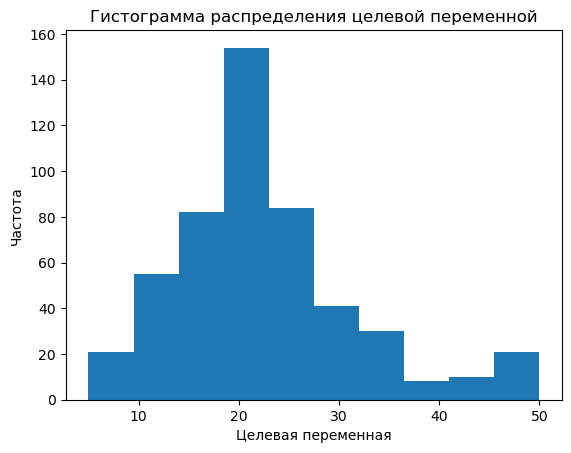

In [66]:
plt.hist(boston['MEDV'], bins=10)
plt.xlabel('Целевая переменная')
plt.ylabel('Частота')
plt.title('Гистограмма распределения целевой переменной')
plt.show();

[Text(0, 0, '50'), Text(0, 0, '50'), Text(0, 0, '50')]

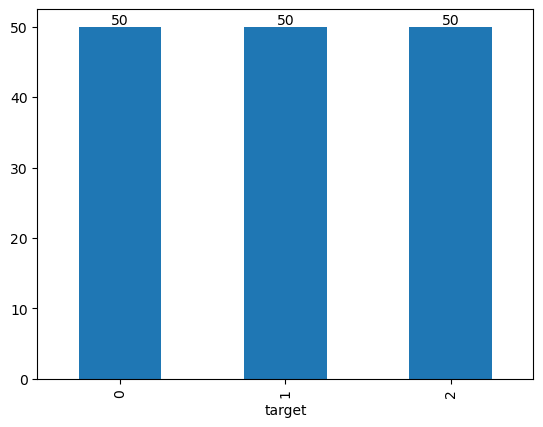

In [61]:
fig = iris['target'].value_counts().plot(kind='bar');
fig.bar_label(fig.containers[0])


#### 2. Разделите данные на обучающую и тестовую выборки.

In [84]:
# Для данных о домах
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_boston = scaler.fit_transform(boston.drop("MEDV", axis=1))
y_boston = boston["MEDV"]
X_boston_train, X_boston_test, y_boston_train, y_boston_test = train_test_split(
    X_boston, y_boston, test_size=0.2, random_state=42
)

In [88]:
# Для данных об ирисах
X_iris = scaler.fit_transform(iris.drop("target", axis=1))
y_iris = iris_data["target"]
X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(
    X_iris, y_iris, test_size=0.2, random_state=42
)


#### 3. Создайте модель регрессии и обучите ее на обучающей выборке.

In [89]:
# Создание модели линейной регрессии

model_lr = LinearRegression()

In [90]:
# Обучение модели на обучающей выборке
model_lr.fit(X_boston_train, y_boston_train)

LinearRegression()


#### 4. Примените метрики для оценки качества модели регрессии на тестовой выборке.

In [91]:
# Предсказание на тестовой выборке
y_boston_pred = model_lr.predict(X_boston_test)

In [92]:
# Вычисление метрик качества
mse = mean_squared_error(y_boston_test, y_boston_pred)
r2 = r2_score(y_boston_test, y_boston_pred)

In [97]:
print(f"Среднеквадратическая ошибка MSE: {mse:.2f}")
print(f"Коэффициент детерминации r2: {r2:.2f}")

Среднеквадратическая ошибка MSE: 25.00
Коэффициент детерминации r2: 0.66


Модель имеет среднюю продсказательную способность, r2 равно 0,66. 


#### 5. Создайте модель классификации и обучите ее на обучающей выборке.

In [98]:
# Создание модели k-ближайших соседей
model_clf = KNeighborsClassifier(n_neighbors=3)

In [99]:
# Обучение модели на обучающей выборке
model_clf.fit(X_iris_train, y_iris_train)

KNeighborsClassifier(n_neighbors=3)


#### 6. Примените метрики для оценки качества модели классификации на тестовой выборке.

In [103]:
# Предсказание на тестовой выборке
y_iris_pred = model_clf.predict(X_iris_test)

In [104]:
# Вычисление метрик качества
from sklearn.metrics import classification_report

In [105]:
print(classification_report(y_iris_test, y_iris_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [106]:
import seaborn as sns

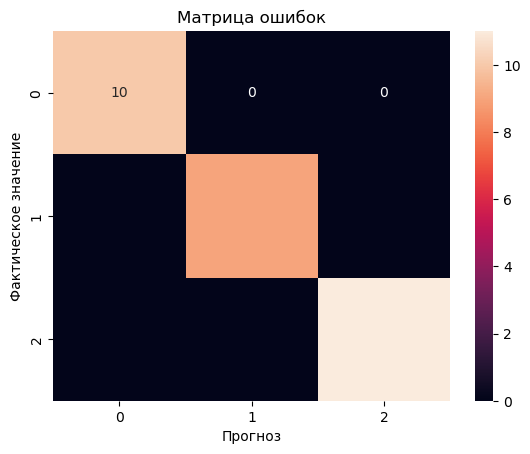

In [112]:
# Визуализация матрицы ошибок
sns.heatmap(confusion_matrix(y_iris_test, y_iris_pred), annot=True, fmt="d")
plt.xlabel("Прогноз")
plt.ylabel("Фактическое значение")
plt.title("Матрица ошибок")
plt.show();

Так как классы сбалансированы, оценку качества можно сделать при помощи aacuracy, эта метрика равна 1, модель идеальна)